# 8. Beards Through Time

```{sidebar} Datasets & APIs
  * Met Museum [API](https://metmuseum.github.io/) and collections data
  * V&A [API](https://developers.vam.ac.uk/guide/v2/) and collections data
```

With the inaccessibility of barbers and hairdressers for much of the last year in the UK due to world events, we naturally start looking for styling inspiration not in social media, but obviously in depictions of beards in historical objects. Let's see what home styling tips we can pickup from the [Metropolitian Museum](https://www.metmuseum.org/) and [V&A](https://www.vam.ac.uk/) collections.

In [12]:
import sys
sys.path.append("/srv/explore-the-collections/code/ivpy/src/")

## Beards at the Met

The Met API lets us [search](https://metmuseum.github.io/#search) amongst its objects, returning a list of object identifers we can then use to get further details for each object, including a thumbnail image we can show.

In [97]:
import requests
import pandas as pd
import csv

req = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard')

met_beard_object_ids = req.json()['objectIDs']
met_beard_objects = []
max_objects = 20
count = 0

for obj_id in met_beard_object_ids:
    
    req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{obj_id}')
    obj_data = req.json()
    
    met_beard_objects.append([obj_data['objectID'], obj_data['title'], obj_data['objectName'], obj_data['medium'], obj_data['artistDisplayName'], obj_data['accessionYear'], obj_data['primaryImageSmall']])
    
    if count > max_objects:
        break
    else:
        count += 1
        
met_beard_objects_df = pd.DataFrame(data=met_beard_objects, columns=['Object ID','Title', 'Object', 'Medium', 'Artist', 'Accession Year', 'Thumbnail'])
met_beard_objects_df.sample(10)

,Object ID,Title,Object,Medium,Artist,Accession Year,Thumbnail
17,547856,"Portrait of a thin-faced, bearded man","Panel painting, thin-faced, bearded man","Encaustic, limewood",,1909,https://images.metmuseum.org/CRDImages/eg/web-...
18,256911,Marble bust of a bearded man,Portrait bust of a bearded man,Marble,,1998,https://images.metmuseum.org/CRDImages/gr/web-...
20,247544,Glass head pendant,Pendant in the form of a man's head,Glass,,1906,https://images.metmuseum.org/CRDImages/gr/web-...
10,257430,Bronze statuette of a standing male figure,Statuette of a bearded man,Bronze,,2000,https://images.metmuseum.org/CRDImages/gr/web-...
15,241033,Terracotta mask,Mask of a bearded male head,Terracotta,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
3,552044,"Head of a bearded man wearing a pointed cap, p...","Head, bearded man",Faience,,1917,https://images.metmuseum.org/CRDImages/eg/web-...
6,242014,Limestone statue of a bearded man with votive ...,"Statue of a man, bearded, wearing a wreath",Limestone,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
2,241121,Terracotta figure,"Statuette of a bearded woman (""Bearded Aphrodi...",Terracotta,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
13,241255,Terracotta mask of a bearded man,Mask of a bearded male head,Terracotta,,1874,https://images.metmuseum.org/CRDImages/gr/web-...
7,255045,Terracotta bust of a man,Protome of a bearded male,Terracotta,,1959,https://images.metmuseum.org/CRDImages/gr/web-...


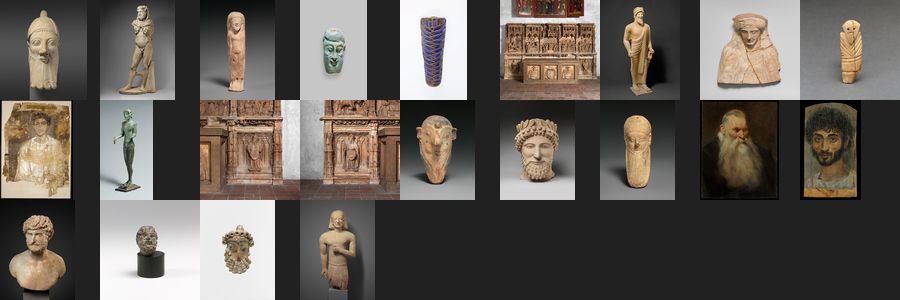

In [98]:
from ivpy import attach,show,compose,montage,histogram,scatter
attach(met_beard_objects_df, "Thumbnail")
show()

Some excellent historical beard inspiration there. 

## Beards at the V&A

We can use the [API](https://developers.vam.ac.uk) to search for beards mentioned in object records at the V&A.

In [99]:
vam_beard_objects_df = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?q=Beard%20-Collection&images_exist=1&response_format=csv&page_size=50')
vam_beard_objects_df.sample(10)

,accessionNumber,accessionYear,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
39,132:15-1885,1885.0,O434063,Painting,NaN,Mughal Empire,Unknown,NaN,second half 17th century,2013GD6641,paint,painted,Mughal,In store,False,False
20,E.537-1929,1929.0,O754278,Drawing,Portrait of a bearded man in a cap,Italy,"Zuccaro, Federico",painter,c.1540- 1609,2017KE6003,red chalk,drawing,Italian school,"Prints & Drawings Study Room, level H",False,False
1,E.1154-2012,2012.0,O1248826,Daguerreotype,NaN,London,Richard Beard,photographer,1841,2016JC0692,glass,daguerreotype,NaN,In store,False,False
37,DYCE.317,NaN,O1043421,Drawing,Head of a bearded young man in profile,NaN,Carlo Maratta,NaN,17th century to early 18th century,2010EF7409,NaN,NaN,NaN,"Prints & Drawings Study Room, level H",False,False
36,CAI.701,NaN,O517020,print,"Bald old man with a short beard, in profile right",Netherlands,Rembrandt van Rijn,artist,ca.1635,2015HN6131,paper (fiber product),etching (printing process),Dutch School,In store,False,False
33,S.1158-1983,1983.0,O1154803,Drawing,NaN,Great Britain,Unknown,artist,ca. 1803-1806,2010EJ6280,paper,drawing (image-making),NaN,In store,False,False
17,29638:161,NaN,O954565,Print,Bearded Sheep.,London,"Kearsley, G.",publisher,01/01/1801,2010EC7184,printing ink,engraving (printing process),NaN,"Prints & Drawings Study Room, level E",False,False
42,161-1865,1865.0,O77433,Shaving mug,Heroes Bearded and Beardless,Etruria,"Redgrave, Richard (CB, RA, ARA)",designer,1848,2006AM2965,NaN,NaN,NaN,"British Galleries, Room 122",False,False
6,E.921-1924,1924.0,O766610,Poster,Molesey Regatta,Great Britain,"Beard, Freda",artist,1924,2014HG8840,lithographic ink,colour lithography,NaN,"Prints & Drawings Study Room, level C",False,False
19,E.536-1929,1929.0,O754279,Drawing,Portrait of a bearded man in a cap,Italy,"Zuccaro, Federico",painter,c.1540-1609,2017KE6109,red chalk,drawing,Italian school,"Prints & Drawings Study Room, level H",False,False


In [100]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
vam_beard_objects_df._primaryImageId = [IIIF_IMAGE_URL % item for item in vam_beard_objects_df._primaryImageId]

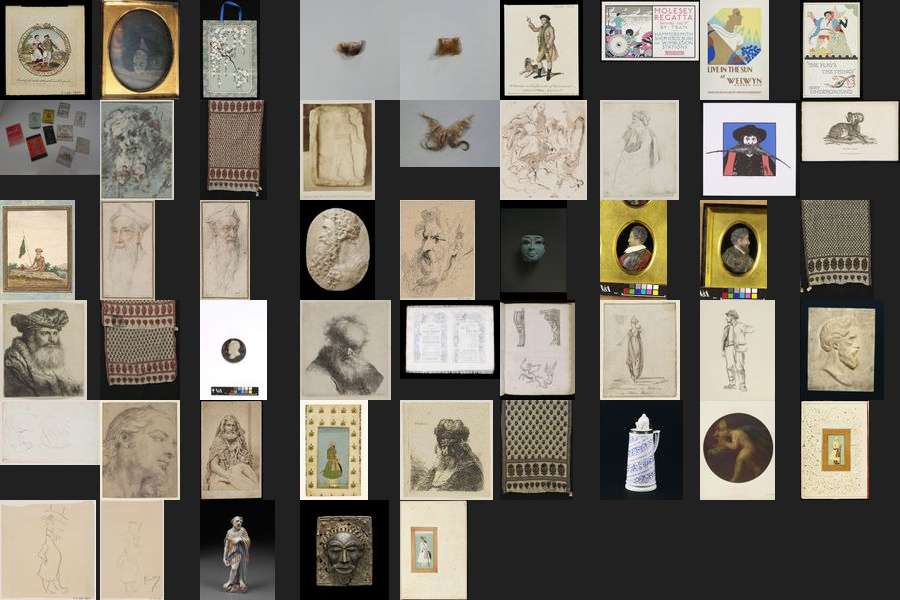

In [102]:
attach(vam_beard_objects_df, "_primaryImageId")
show()

A range of objects there, but still with some excellent beards visible

Let's look now if we can see any trends in beards depictioned on objects over the last thousand years.

## Beards over the last millenium - V&A

In [63]:
import pandas as pd

start_century = 1000
end_century = 2100
beard_objects_df = pd.DataFrame()

for century in range(start_century, end_century, 100):
  beard_obj_century = pd.read_json(f'https://api.vam.ac.uk/v2/objects/clusters/object_type/search?q=Beard%20-Collection&year_made_from={century}&year_made_to={century+99}&cluster_size=20')
# Remove some object types with very low counts to make graphic more readable
  beard_obj_century.drop( beard_obj_century[ beard_obj_century['count'] < 5 ].index, inplace=True)
  beard_obj_century['century'] = century 
  beard_objects_df = beard_objects_df.append(beard_obj_century)
    
beard_objects_df.head(15)

,id,value,count,count_max_error,century
0,Panel,Panel,14,0,1300
1,Statuette,Statuette,6,0,1300
2,Relief,Relief,5,0,1300
0,Panel,Panel,124,0,1400
1,Relief,Relief,24,0,1400
2,Statuette,Statuette,19,0,1400
3,Fragment of a panel,Fragment of a panel,8,0,1400
4,Statue,Statue,6,0,1400
5,Figure,Figure,5,0,1400
0,Panel,Panel,103,0,1500


In [64]:
import altair as alt

alt.Chart(beard_objects_df).mark_circle().encode(
    x='century:O',
    y='value:O',
    size='sum(count):Q'
)

alt.Chart(...)

So it seems like the 14th and 15th centuries were a good time for beards on objects in the V&A Collection, things have tailed off a little recently sadly. Let's try the same for the Met. We need to handle the count aggregations ourselves for this (just taking the top 100 objects)

## Beards over the last millenium - Met

In [94]:
import requests
import pandas as pd
import csv
from time import sleep

req = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard')

met_summer_object_ids = req.json()['objectIDs']
met_summer_objects = []
max_objects = 20
count = 0

start_century = 1000
end_century = 2100

beard_objects_df = met_beard_centuries_df = pd.DataFrame()

for century in range(start_century, end_century, 100):
  req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/search?q=beard&dateBegin={century}&dateEnd={century+99}')
  req_json = req.json()

  if req_json['total'] < 1:
    continue

  met_beard_object_ids = req_json['objectIDs']
    
  object_types = {}
  # We just take the top 100 objects (with pauses) to be nice to the Met API server
  nice = 0
  for obj_id in met_beard_object_ids[0:100]:
     
    req = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{obj_id}')
    obj_data = req.json()

    if obj_data['objectName'] in object_types:
      object_types[obj_data['objectName']] += 1
    else:
      object_types[obj_data['objectName']] = 1
    
    if nice > 25:
        sleep(1)
        nice = 0
    else:
        nice += 1
  
  century_df = pd.DataFrame([(type,object_types[type]) for type in object_types], columns=['type', 'count'])
    
  century_df['century'] = century
                   
  met_beard_centuries_df = met_beard_centuries_df.append(century_df)
  
met_beard_centuries_df.head(10)

,type,count,century
0,Handscroll,1,1100
0,Box,1,1200
1,Section from a non-illustrated manuscript,1,1200
0,"Painting, triptych",1,1300
1,"Painting, cassone panel",1,1300
0,Painting,11,1400
1,Relief,1,1400
2,Handscroll,1,1400
3,Missal; Manuscript,1,1400
4,"Painting, diptych",1,1400


In [95]:
import altair as alt

alt.Chart(met_beard_centuries_df).mark_circle().encode(
    x='century:O',
    y='type:O',
    size='sum(count):Q'
)

alt.Chart(...)

So for our sample from the Met, a fairly low but consistent presence of beards in paintings from the 14th century onwards, with an intriguing spike in the 17th century for armchairs 
(perhaps a furniture maker with the name of 'Beard' rather than a trend for armchairs made from beard hair, do let us know if you know more).

## Further Beard Studies

An obvious next step would be to run some image analysis on the matched objects to extract and classify beard styles over the millenia. We will return to this important research 
project when time allows.